In [64]:
#Add packages
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
import scipy.stats as ss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
import time 
from operator import itemgetter
import os
os.getcwd()

'/Users/mpgartland1/Documents/Documents/Courses/Data Mining/Week 5'

In [42]:
#import data
df = pd.read_csv("bank-full.csv", sep=',')
df.head(10)

,age::number,job::category,marital::category,education::category,default::category,balance::number,housing::category,loan::category,contact::category,day::number,month::category,duration::number,campaign::number,pdays::number,previous::number,poutcome::category,y::category
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [43]:
print df.columns

Index([u'age::number', u'job::category', u'marital::category', u'education::category', u'default::category', u'balance::number', u'housing::category', u'loan::category', u'contact::category', u'day::number', u'month::category', u'duration::number', u'campaign::number', u'pdays::number', u'previous::number', u'poutcome::category', u'y::category'], dtype='object')


In [44]:
# designate target variable name
targetName = 'y::category'
# move target variable into first column
targetSeries = df[targetName]
del df[targetName]
df.insert(0, targetName, targetSeries)
expected=targetName
df.head(10)

,y::category,age::number,job::category,marital::category,education::category,default::category,balance::number,housing::category,loan::category,contact::category,day::number,month::category,duration::number,campaign::number,pdays::number,previous::number,poutcome::category
0,no,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,no,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,no,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,no,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,no,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
5,no,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown
6,no,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown
7,no,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown
8,no,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown
9,no,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown


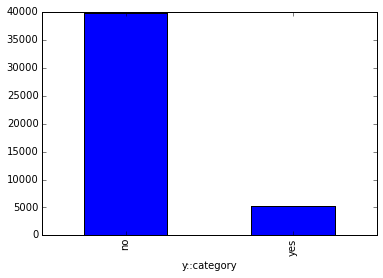

In [45]:
gb = df.groupby(targetName)
targetEDA=gb[targetName].aggregate(len)
plt.figure()
targetEDA.plot(kind='bar', grid=False)
plt.axhline(0, color='k')

In [46]:
# binarize target variable
df['y::category'] = targetSeries


In [47]:
#label_binarize(df['DEPOSIT?'], classes=['N', 'Y'])
from sklearn import preprocessing
le_dep = preprocessing.LabelEncoder()
#to convert into numbers
df['y::category'] = le_dep.fit_transform(df['y::category'])

In [48]:
# perform data transformation
for col in df.columns[1:]:
	attName = col
	dType = df[col].dtype
	missing = pd.isnull(df[col]).any()
	uniqueCount = len(df[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
		del df[attName]

In [49]:
# define normal distribution fit function
def fit_dist(dfColumn):
	# convert series into numpy array
	ndArray = np.array(dfColumn)
    # fit our data set against normal probability distribution
	parameters = eval("ss.norm.fit(ndArray)")
    # applying the Kolmogorov-Smirnof one sided test
 	D, p = ss.kstest(ndArray, "norm", args=parameters)
 	if D < 0.02 and p > 0.05:
 		return True
 	else:
 		return False
    
# impute missing values
for col in df.columns[1:]:
	attName = col
	dType = df[col].dtype
	missing = pd.isnull(df[col]).any()
	uniqueCount = len(df[attName].value_counts(normalize=False))
	distCheck = fit_dist(df[attName])
	col_mean = df[attName].dropna().mean()
	col_median = df[attName].dropna().median()
	col_mode = df[attName].dropna().mode()
	if (distCheck == True and missing == True and uniqueCount > 2):
		df[attName] = df[attName].fillna(col_mean)
	if (distCheck == False and missing == True and uniqueCount > 2):
		df[attName] = df[attName].fillna(col_median)
	if (distCheck == False and missing == True and uniqueCount <= 2):
		df[attName] = df[attName].fillna(col_mode)

In [50]:
# split dataset into testing and training
features_train, features_test, target_train, target_test = train_test_split(
    df.ix[:,1:].values, df.ix[:,0].values, test_size=0.30, random_state=0)

In [51]:
print features_test.shape
print features_train.shape
print target_test.shape
print target_train.shape

(13564, 51)
(31647, 51)
(13564,)
(31647,)


In [52]:
#Decision Tree train model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features_train, target_train)
#DT test model
target_predicted_dt = clf.predict(features_test)
print "DT Accuracy Score", accuracy_score(target_test, target_predicted_dt)
# print classification report
target_names = ["Fail = no", "Fail = yes"]
print(classification_report(target_test, target_predicted_dt, target_names=target_names))

DT Accuracy Score 0.872087879682
             precision    recall  f1-score   support

  Fail = no       0.93      0.92      0.93     11969
 Fail = yes       0.46      0.49      0.47      1595

avg / total       0.88      0.87      0.87     13564



In [53]:
#verify DT with Cross Validation
scores = cross_val_score(clf, features_train, target_train, cv=10)
print "Cross Validation Score for each K",scores
scores.mean()                             

Cross Validation Score for each K [ 0.87239419  0.87934302  0.86986734  0.87519747  0.86946903  0.88305942
  0.87484197  0.89222503  0.87705436  0.87294564]


0.87663974694788216

[[11045   924]
 [  811   784]]


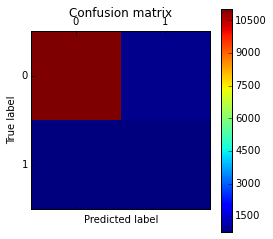

In [54]:
# display confusion matrix
cm = confusion_matrix(target_test, target_predicted_dt)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print(cm)

In [55]:
# train random forest model
#paralleized to 4 cores 
rf = RandomForestClassifier(n_estimators= 500, n_jobs=4,oob_score=True)
rf.fit(features_train, target_train)
# test random forest model
target_predicted_rf = rf.predict(features_test)
print accuracy_score(target_test, target_predicted_rf)
target_names = ["Fail = no", "Fail = yes"]
print(classification_report(target_test, target_predicted_rf, target_names=target_names))


0.903568268947
             precision    recall  f1-score   support

  Fail = no       0.92      0.97      0.95     11969
 Fail = yes       0.64      0.41      0.50      1595

avg / total       0.89      0.90      0.89     13564



In [56]:
#verify RF with cross validation
scores_rf = cross_val_score(rf, features_train, target_train, cv=10)
print "Cross Validation Score for each K",scores_rf
scores_rf.mean()

Cross Validation Score for each K [ 0.90492735  0.90555907  0.90366393  0.90363349  0.90328698  0.91055626
  0.90929204  0.91719343  0.90265487  0.90613148]


0.90668988830005703

[[11605   364]
 [  944   651]]


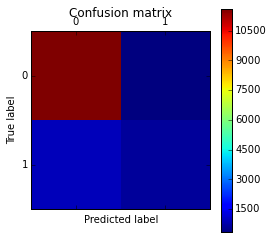

In [57]:
# display confusion matrix
cm = confusion_matrix(target_test, target_predicted_rf)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print(cm)

In [58]:
# use a full grid over all parameters
param_grid = {"max_features": [2, 3, 4, 5]}

# run grid search
grid_search = GridSearchCV(rf, param_grid=param_grid)
start = time()
grid_search.fit(features_train, target_train)
print grid_search.grid_scores_

[mean: 0.89882, std: 0.00113, params: {'max_features': 2}, mean: 0.90122, std: 0.00162, params: {'max_features': 3}, mean: 0.90261, std: 0.00125, params: {'max_features': 4}, mean: 0.90438, std: 0.00150, params: {'max_features': 5}]


In [59]:
neigh3 = KNeighborsClassifier(n_neighbors=3)
neigh3.fit(features_train, target_train)
# test KNN 3
target_predicted_knn3 = neigh3.predict(features_test)
print accuracy_score(target_test, target_predicted_knn3)
target_names = ["Fail = no", "Fail = yes"]
print(classification_report(target_test, target_predicted_knn3, target_names=target_names))

0.872014155116
             precision    recall  f1-score   support

  Fail = no       0.91      0.95      0.93     11969
 Fail = yes       0.43      0.29      0.35      1595

avg / total       0.85      0.87      0.86     13564



In [60]:
neigh5 = KNeighborsClassifier(n_neighbors=5)
neigh5.fit(features_train, target_train)
# test KNN 3
target_predicted_knn5 = neigh5.predict(features_test)
print accuracy_score(target_test, target_predicted_knn5)
target_names = ["Fail = no", "Fail = yes"]
print(classification_report(target_test, target_predicted_knn5, target_names=target_names))

0.876142730758
             precision    recall  f1-score   support

  Fail = no       0.91      0.96      0.93     11969
 Fail = yes       0.45      0.26      0.33      1595

avg / total       0.85      0.88      0.86     13564



In [61]:
#Show importance of each feature in Random Forest
zip(df.columns[1:20], rf.feature_importances_)

[('age::number', 0.089213211798984615),
 ('balance::number', 0.092247565168726939),
 ('day::number', 0.079311981601199719),
 ('duration::number', 0.26835413563332383),
 ('campaign::number', 0.03756363942920217),
 ('pdays::number', 0.038058988576460957),
 ('previous::number', 0.019399481567459284),
 ('job::category_admin.', 0.0088706002967636147),
 ('job::category_blue-collar', 0.0084383131076074432),
 ('job::category_entrepreneur', 0.003543345087983262),
 ('job::category_housemaid', 0.0031277163302321775),
 ('job::category_management', 0.010313650858642213),
 ('job::category_retired', 0.0050115147204261631),
 ('job::category_self-employed', 0.0044248971050289349),
 ('job::category_services', 0.0065406987203713825),
 ('job::category_student', 0.0043148500757249336),
 ('job::category_technician', 0.010622438878385709),
 ('job::category_unemployed', 0.0045777556851348744),
 ('job::category_unknown', 0.0013443448302054833)]

ROC AUC: 0.93


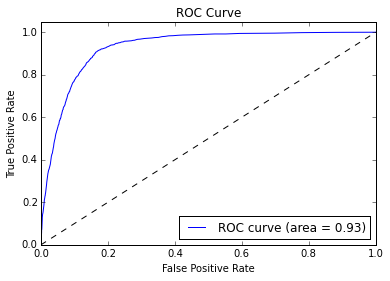

In [62]:
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(target_test, rf.predict_proba(features_test)[:,1]) 
    
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print 'ROC AUC: %0.2f' % roc_auc
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()